#Statistic Lab Ex7

*By:\
Ariel Ginensky: 312297559\
Ron Tzidon 315313577\
Shahar Zismanovich 205518905*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import ssl
from matplotlib import rcParams
import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib inline

## Question 1

#### a)

In [3]:
df = pd.read_csv('expb.csv') 

#Removing outer envelopes:

#df = df[df.בזב != 0]

#Subset data frame
new_df = df.iloc[:,11:]

#eenaming the columns by the parties name

party_names_dict = { 'מחל':'ליכוד','פה':'יש עתיד','שס':'שס','כן':'כחול לבן',
                    'ב':'ימינה','אמת':'עבודה','ג':'יהדות התורה',
                    'ל':' ישראל ביתנו','ט':'ציונות דתית','ודעם':'משותפת','ת':'תקוה חדשה',
                     'מרצ':'מרצ','עם':'רעם','רק':'דמוקרטית','רף':'עם שלם'
                     ,'רנ':'התקווה לשינוי','ר':'רפא','קץ':'משפט צדק','קך':'סדר חדש','קי':'שמע'
                     ,'ק':'הבלתי אפשרי, אפשרי','ץ':'דעם','צף':'חץ','צכ':'מען (יחד) לעידן חדש'
                     ,'צי':'עצמנו עצמאים וליברלים'
                     ,'ףז':'הפיראטים','נר':'אנחנו','ני':'עולם חדש','נ':'קידום מעמד הפרט'
                     ,'כך':'אני ואתה','כ':'הלב היהודי','יר':'מנהיגות חברתית','יק':'הגוש התנכ״י'
                     ,'יף':'כבוד האדם','ינ':'ברית השותפות לאיחוד לאומי' ,'י':'המפץ החברתי - גימלאים'
                      ,'זץ':'צומת - עצמאים, חקלאים, כפרים','ז':'הישראלים','יז':'הכלכלית'
                     ,'זך' : 'קמ"ה','ום': 'חד"ש תע"ל','ד': 'בל"ד' ,'אצ' : 'חופש כלכלי'
                      ,'זנ' : 'כח להשפיע','ך': 'אני ואתה','יץ' : 'צו השעה','נק' : 'יש כיוון'
                     ,'נץ' : 'העצמאים החדשים','נף' : 'מפלגת שמע','נז' : 'כבוד האדם'
                     ,'קנ' : 'כל קול קובע','צ' : 'צעירים בוערים','ף' : 'הפיראטים'
                      ,'רז' : 'רשימת שלושים\ארבעים'}

    
new_df.rename(columns=party_names_dict,
              inplace=True)






In [4]:
party_13 = {"אמת": "עבודה", "ב": "הבית היהודי", "ג": "יהדות התורה",
               "ום": "המשותפת", "ט": "הציונות הדתית", "כן": "המחנה הממלכתי",
               "ל": "ישראל ביתנו", "מחל": "ליכוד", "מרצ": "מרצ",
               "ת": "תקווה חדשה", "עם": "רע'מ", "פה": "יש עתיד", "שס": "שס",
               "ד": "בלד", "ודעם": "המשותפת"}

big_13 = df.sum()[11:].sort_values(ascending=False)[:13].index

correct_names = []

for party in big_13:
     correct_names.append(party_13[party][::-1])

In [5]:
s = new_df.sum(axis = 1).values

freq_df = new_df.div(s, axis = 0)

pca = PCA(n_components=2) 

ballot_pca = pca.fit_transform(freq_df.T)

PC1, PC2 = ballot_pca[:,0], ballot_pca[:,1]

normed_PC1 = PC1/np.linalg.norm(PC1)

normed_PC2 = PC2/np.linalg.norm(PC2)



In [6]:
party_names = new_df.keys()

X = [name[::-1] for name in party_names]

X_axis = np.arange(len(X))

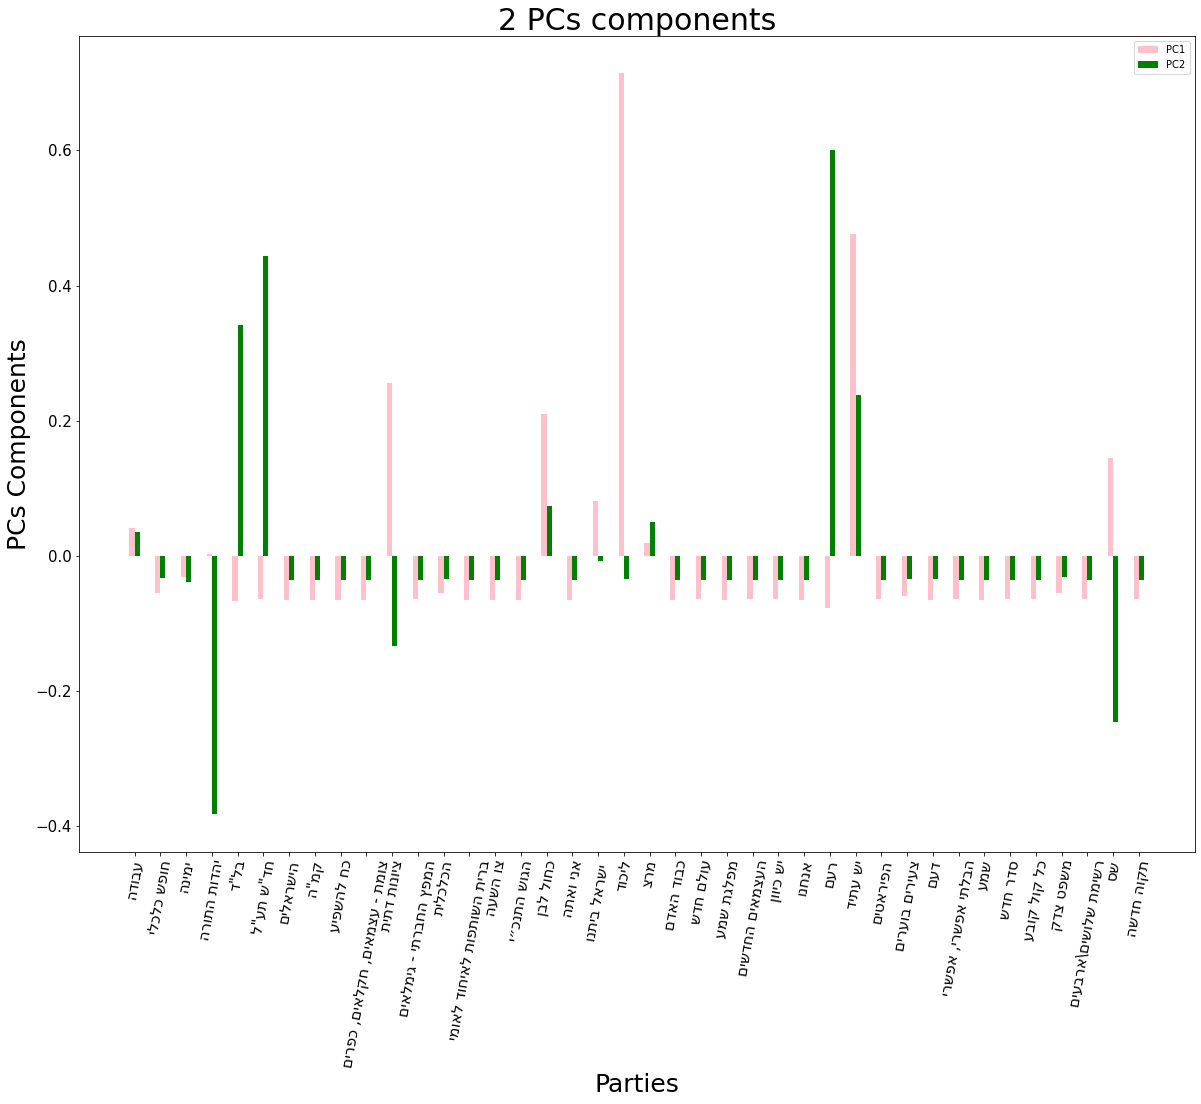

In [7]:
plt.figure(figsize=(20,15)) 
plt.bar(X_axis - 0.1,normed_PC1, 0.2, label = 'PC1', color = 'pink')
plt.bar(X_axis + 0.1, normed_PC2, 0.2, label = 'PC2',color = 'green')
plt.xticks(X_axis, X,fontsize = 15,rotation = 80)
plt.yticks(fontsize = 15)
plt.xlabel("Parties",fontsize = 25)
plt.ylabel("PCs Components",fontsize = 25)
plt.title("2 PCs components",fontsize = 30)
plt.legend()
plt.show()

## Conclusions from the results:

The most dominance parties for the first two PCs, as we can see from the plot above, are:

For PC1

*   'הציונות הדתית' (around 0.2)
*   'כחול לבן' (around 0.2)
* 'הליכוד' (around 0.6)
* 'יש עתיד' (around 0.5)
* 'שס' (around 0.2)

As we can see the parties above has the largest PC1, which has the most attributes over the explained variance. 

For PC2:



*   'יהדות התורה' (around -0.4)
*'בל"ד' (around 0.3)
*   'חד"ש תע"ל' (around 0.5)
*'רעם' (around 0.6)
*'יש עתיד' (around 0.2)
*'שס' (around -0.2)


#### b)



*   As we can see from the Code below, the ninimal j that gives us $V_{j}$ when Vj is the variance after the j'th PC, is 40:\
As we can see from the resulted plot, for each j in 1..p,\
(when p = 39) the absolute value of the variance is bigger than 0. \
That means that the first time that we"ll get  $V_{j}=0$ will be when j =40.\
That is because there won't be any more components that can explain the variance.

* The minimal k in which at least 50 percent of the varaince is explained by the first k PCs is 20:\
The reason for that is because that:\
$V_{1}> V_{2} > ...> V_{p}$\
And because that $V_{j} > 0 $ for $1 \le j \le p$\
now we can see that the for k = 20 which is the index of the median of $V{1},V_{2},...V_{p}$ we"ll get the sirst PC that explains at least 50 % from the variance.



In [8]:

pca2 = PCA()
pca2.fit(new_df)
variance_explained = pca.explained_variance_ratio_

print(0 in variance_explained)



False


#Question 2

#### a)

In [9]:
#Importing the files

df_21  = pd.read_csv('votes per city 2021.csv', encoding='iso-8859-8') 

df_22  = pd.read_csv('votes per city - 2022.csv')

# Removing outer envelopes

df_21 = df_21.iloc[:-1,:-1]

df_22 = df_22.iloc[:-1,:]


In [10]:
# Adjusting the 21 results data frame

df_21['כן'] = df_21['כן'] + df_21['ת']
df_21['ום'] = df_21['ודעם'] * 0.6
df_21['ד'] = df_21['ודעם'] * 0.4
df_21['ט'] = df_21['ט'] + df_21['ב'] * 0.6
df_21['ב'] = df_21['ב'] * 0.4
df_21.drop(columns=['ודעם', 'ת'], inplace=True, axis=0)

# Renaing the columns

df_21.rename(columns=party_names_dict,inplace=True)

df_22.rename(columns=party_names_dict,inplace=True)

In [11]:
# Substracting the data frames

top_13 = df_21.sum(axis = 0)[7:].sort_values( ascending=False).head(13).index

new_df_21 = df_21[top_13]

new_df_22 = df_22[top_13]

In [12]:
# Normalize the data frames by frequencies

sums_21 = new_df_21.sum(axis = 1)

normed_21 = new_df_21.divide(sums_21,axis = 0)

sums_22 = new_df_22.sum(axis = 1)

normed_22 = new_df_22.divide(sums_22,axis = 0)

normed_21.insert(loc = 0, column = 'שם ישוב', value = df_21['שם ישוב'])

normed_21.insert(loc = 1, column = 'בזב', value = df_21['בזב'])

normed_22.insert(loc = 0, column = 'שם ישוב', value = df_22['שם ישוב'])

normed_22.insert(loc = 1, column = 'בזב', value = df_22['בזב'])

normed_21.insert(loc = 2, column = 'שנה', value = 2021)

normed_22.insert(loc = 2, column = 'שנה', value = 2022)

In [13]:
normed_21 = normed_21.sort_values(by = 'שם ישוב').reset_index(drop = True)
normed_22 = normed_22.sort_values(by = 'שם ישוב').reset_index(drop = True)

In [14]:
# Merging the data frames 

merged_df = pd.concat([normed_21,normed_22] ,axis = 0)

# Removing all the cities that are not in both od the data frames:

city_21 =df_21['שם ישוב'].values

city_22 =df_22['שם ישוב'].values

keep_cities = list(set(city_21).intersection(city_22))

mask = merged_df['שם ישוב'].isin(keep_cities)

merged_df = merged_df.loc[mask]

# Presenting first 10 rows

merged_df.head(10)

,שם ישוב,בזב,שנה,ליכוד,יש עתיד,כחול לבן,ציונות דתית,שס,יהדות התורה,עבודה,ישראל ביתנו,מרצ,רעם,"חד""ש תע""ל",ימינה,"בל""ד"
0,אבו גווייעד שבט,2149,2021,0.006042,0.000000,0.018127,0.001813,0.000000,0.000000,0.003021,0.000000,0.003021,0.930514,0.021752,0.001208,0.014502
1,אבו גוש,4961,2021,0.246504,0.023822,0.007768,0.001761,0.006732,0.002071,0.009322,0.002071,0.035215,0.171414,0.295495,0.000829,0.196996
2,אבו סנאן,9705,2021,0.114735,0.019288,0.057069,0.001233,0.105786,0.000199,0.004375,0.078544,0.019089,0.176576,0.253768,0.000159,0.169179
3,אבו עבדון שבט,150,2021,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.730769,0.069231,0.000000,0.046154
4,אבו קורינאת שבט,3193,2021,0.011033,0.008024,0.002006,0.000000,0.000000,0.000000,0.001003,0.000000,0.004012,0.924774,0.029488,0.000000,0.019659
5,אבו קרינאת יישוב,621,2021,0.020000,0.008000,0.016000,0.000000,0.004000,0.000000,0.000000,0.000000,0.004000,0.908000,0.024000,0.000000,0.016000
6,אבו רובייעה שבט,4221,2021,0.054852,0.005274,0.004219,0.001266,0.014768,0.000000,0.010549,0.000000,0.009494,0.801688,0.058228,0.000844,0.038819
7,אבו רוקייק שבט,5091,2021,0.024291,0.004049,0.000000,0.000000,0.002313,0.000000,0.001157,0.000000,0.004627,0.899364,0.038519,0.000000,0.025680
8,אבו תלול,1004,2021,0.031513,0.000000,0.000000,0.000000,0.000000,0.000000,0.002101,0.000000,0.006303,0.913866,0.027731,0.000000,0.018487
9,אבטין,1876,2021,0.091190,0.012365,0.029366,0.000000,0.003091,0.001546,0.004637,0.001546,0.009274,0.591963,0.153014,0.000000,0.102009


#### b)


In [15]:
#PCA of first two components
city_pca = pca.fit_transform(merged_df.drop(columns = ['בזב','שם ישוב','שנה'], inplace = False))

PCA1 = city_pca[:,0]

PCA2 = city_pca[:,1]


In [16]:
city_pca_df = pd.DataFrame({'PC1' : PCA1,'PC2' : PCA2, 'year': merged_df['שנה'],'בזב': merged_df['בזב']})

city_pca_21 = city_pca_df[city_pca_df['year'] == 2021]

city_pca_22 = city_pca_df[city_pca_df['year'] == 2022]

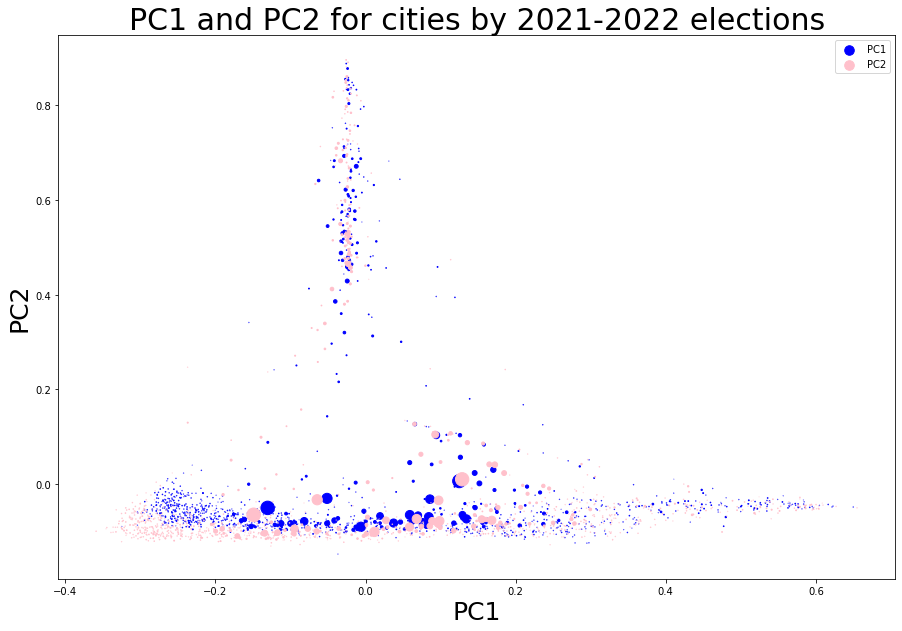

In [17]:
#Plot of PC1 and PC2 for cities by 2021-2022 elections
n = len(merged_df)
plt.figure(figsize=(15,10)) 
scatter1 = plt.scatter(city_pca_21['PC1'],city_pca_21['PC2'], color = 'blue',s = city_pca_21['בזב']/n)
scatter2 = plt.scatter(city_pca_22['PC1'],city_pca_22['PC2'], color = 'pink',s = city_pca_22['בזב']/n)
plt.legend(handles = [scatter1,scatter2],labels = ['PC1','PC2'])
plt.xlabel("PC1",fontsize = 25)
plt.ylabel("PC2",fontsize = 25)
plt.title("PC1 and PC2 for cities by 2021-2022 elections",fontsize = 30)
plt.show()

We noticed a pattern where cities that first component is close to zero have a large number in the second component, while cities that the varience is explained well in the first component have low values in the second component.

#### C)

In [18]:
#Subseting to cities with בזב>10000 and that appear both in 2021 and 2022
index_for_arrow_2021 = (merged_df['בזב'] > 10000) & (merged_df['שנה'] == 2021)
index_for_arrow_2022 = (merged_df['שנה'] == 2022)
city_intersect_for_arrow = set(merged_df.loc[index_for_arrow_2021, 'שם ישוב']).intersection(set(merged_df.loc[index_for_arrow_2022, 'שם ישוב']))

index_for_arrow_2021 = (merged_df['שנה'] == 2021) & (merged_df['שם ישוב'].isin(city_intersect_for_arrow))
index_for_arrow_2022 = (merged_df['שנה'] == 2022) & (merged_df['שם ישוב'].isin(city_intersect_for_arrow))

index_for_arrow_2021 = np.argwhere(index_for_arrow_2021.to_numpy()).ravel()
index_for_arrow_2022 = np.argwhere(index_for_arrow_2022.to_numpy()).ravel()

merged_df = merged_df.reset_index()

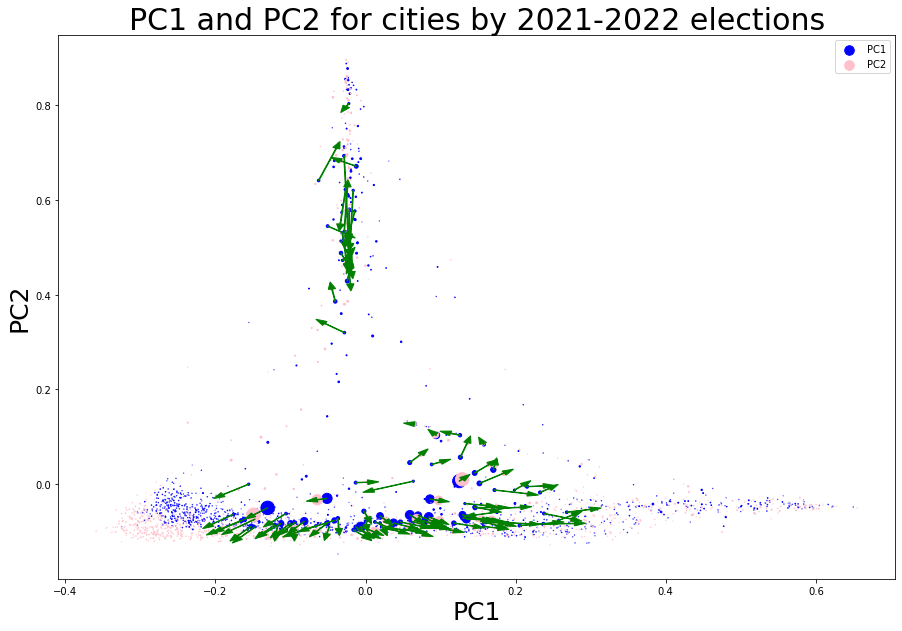

In [19]:
#Plot of PC1 and PC2 for cities by 2021-2022 elections with arrows connecting dots of cities with בזב>10000 in 2021
plt.figure(figsize=(15,10)) 
scatter1 = plt.scatter(city_pca_21['PC1'],city_pca_21['PC2'], color = 'blue',s = city_pca_21['בזב']/n)
scatter2 = plt.scatter(city_pca_22['PC1'],city_pca_22['PC2'], color = 'pink',s = city_pca_22['בזב']/n)
plt.legend(handles = [scatter1,scatter2],labels = ['PC1','PC2'])
plt.xlabel("PC1",fontsize = 25)
plt.ylabel("PC2",fontsize = 25)
plt.title("PC1 and PC2 for cities by 2021-2022 elections",fontsize = 30)

for i in range(len(index_for_arrow_2021)):
    a = city_pca[index_for_arrow_2022[i], 0] - city_pca[index_for_arrow_2021[i], 0]
    b =  city_pca[index_for_arrow_2022[i],1] - city_pca[index_for_arrow_2021[i],1]
    plt.arrow(x=city_pca[index_for_arrow_2021[i],0],y=city_pca[index_for_arrow_2021[i],1], dx=a, dy=b,head_width = 0.01 ,color ='green')
plt.show()

The arroes show a pattern of cities with high בזב to have close to zero first components. 

#### d)

In [30]:
#Euclidean distances
euc_distance = ((city_pca[index_for_arrow_2022,0] - city_pca[index_for_arrow_2021, 0])**2 + (city_pca[index_for_arrow_2022,1] - city_pca[index_for_arrow_2021,1])**2)** (1/2)
euc_distance_index = euc_distance.argsort()[-3:].tolist()


In [29]:
#names of 3 cities with largest euclidean distance
new_normed_2021 = merged_df.iloc[index_for_arrow_2021].reset_index()
euc_distance_city_names = new_normed_2021.loc[euc_distance_index, 'שם ישוב'].tolist()
euc_distance_city_names

['כפר קרע', 'כפר מנדא', 'סחנין']

In [31]:
#normaled data frame for 2021 with cities that also appear in 2022
new_normed_2021 = merged_df.iloc[index_for_arrow_2021].copy().reset_index()
new_normed_2021 = new_normed_2021.iloc[:,2:]

#normaled data frame for 2022 with cities that also appear in 2021
new_normed_2022 = merged_df.iloc[index_for_arrow_2022].copy().reset_index()
new_normed_2022 = new_normed_2022.iloc[:,2:]


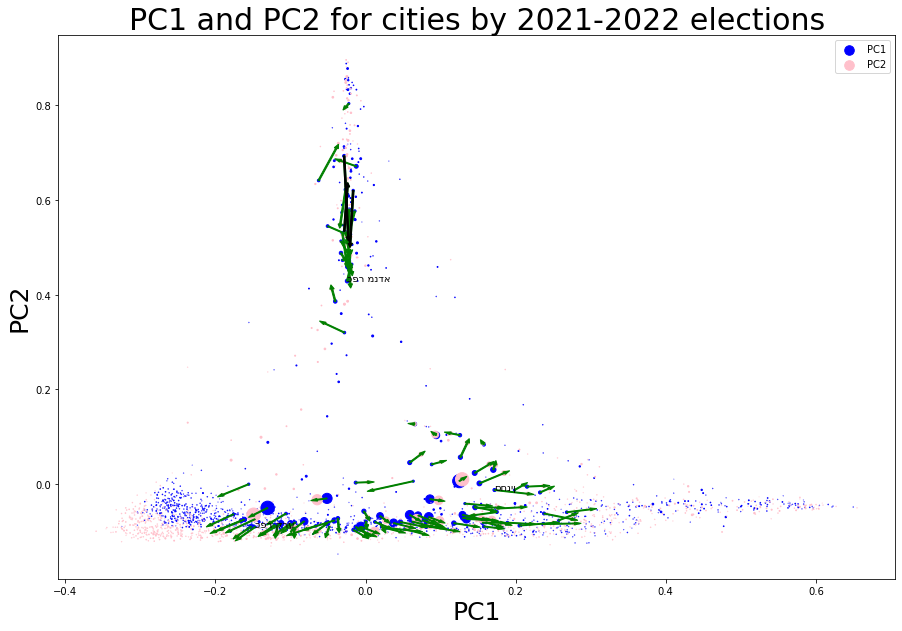

In [33]:
#Plot of PC1 and PC2 for cities by 2021-2022 elections with arrows connecting dots of cities with בזב>10000 in 2021 in green,
#black arrows mark 3 cities with largest euclidean distance between 2021 and 2022
plt.figure(figsize=(15,10)) 
scatter1 = plt.scatter(city_pca_21['PC1'],city_pca_21['PC2'], color = 'blue',s = city_pca_21['בזב']/n)
scatter2 = plt.scatter(city_pca_22['PC1'],city_pca_22['PC2'], color = 'pink',s = city_pca_22['בזב']/n)
plt.legend(handles = [scatter1,scatter2],labels = ['PC1','PC2'])
plt.xlabel("PC1",fontsize = 25)
plt.ylabel("PC2",fontsize = 25)
plt.title("PC1 and PC2 for cities by 2021-2022 elections",fontsize = 30)

for i in range(len(index_for_arrow_2021)):
    a = city_pca[index_for_arrow_2022[i], 0] - city_pca[index_for_arrow_2021[i], 0]
    b =  city_pca[index_for_arrow_2022[i],1] - city_pca[index_for_arrow_2021[i],1]
    plt.arrow(x=city_pca[index_for_arrow_2021[i],0],y=city_pca[index_for_arrow_2021[i],1], dx=a, dy=b,color = 'green', width = 0.002)

for i in euc_distance_index:
  a = city_pca[index_for_arrow_2022[i], 0] - city_pca[index_for_arrow_2021[i], 0]
  b = city_pca[index_for_arrow_2022[i], 1] - city_pca[index_for_arrow_2021[i], 1]
  plt.arrow(x= city_pca[index_for_arrow_2021[i], 0], y= city_pca[index_for_arrow_2021[i], 1], dx= a, dy= b, color = 'black', width = 0.002)
  
#adding labels to 3 cities with large euclidean distance
#for i in range(len(euc_distance_index)):  
#  plt.annotate(euc_distance_city_names[i], xy= (city_pca[index_for_arrow_2021[i], 0], city_pca[index_for_arrow_2021[i], 1]))


plt.show()


In [34]:
#bar plot for 3 cities with large euclidean distance, showing the relative votes for 13 largest parties
mask = merged_df['שם ישוב'].isin(euc_distance_city_names)

top_3_df = merged_df.loc[mask]

In [35]:
party_names = top_3_df.keys()[4:]

X = [name[::-1] for name in party_names]

X_axis = np.arange(len(X))

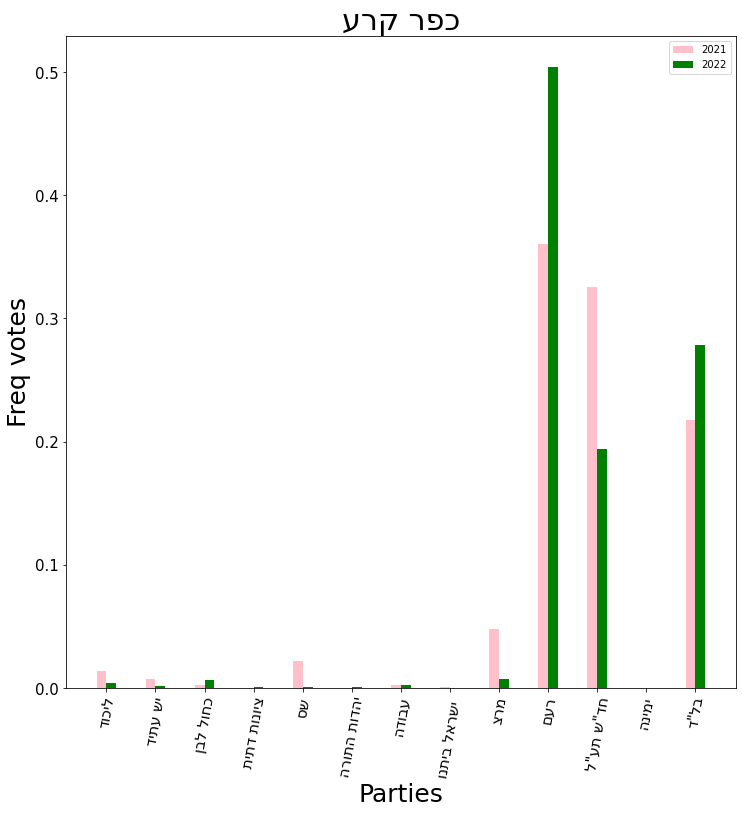

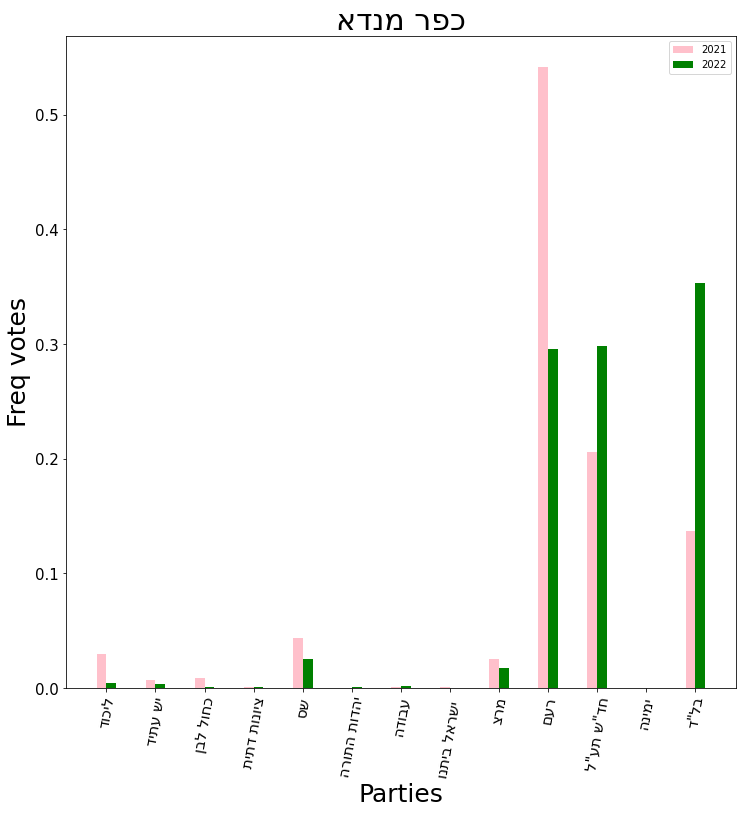

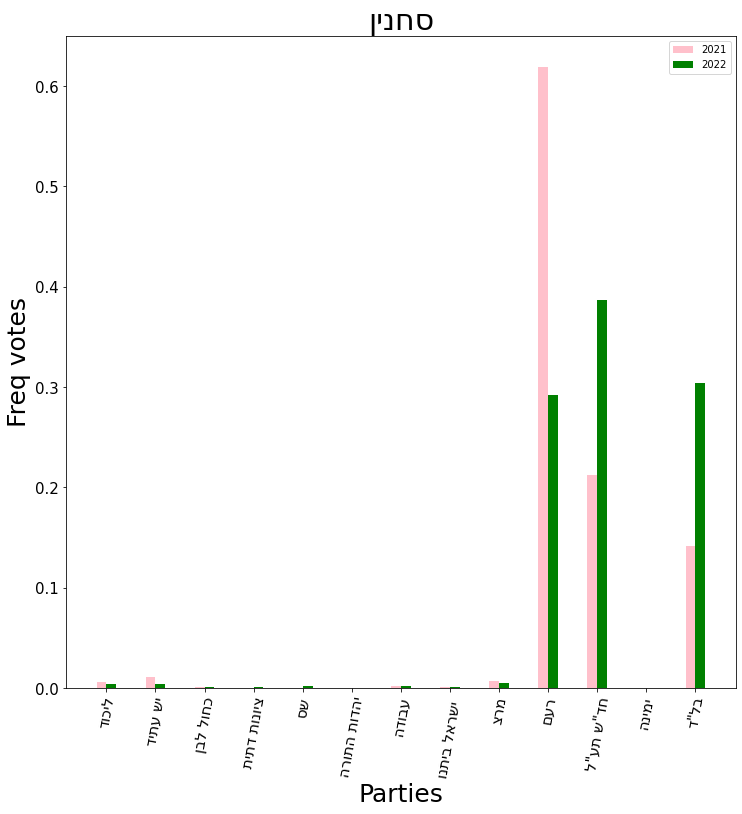

In [36]:
for i in range(3):

  city = euc_distance_city_names[i]
  plt.figure(figsize=(12,12)) 
  city_df = top_3_df[top_3_df['שם ישוב'] == city]
  city_21 = city_df[city_df['שנה']== 2021].values[0][4:]
  city_22 = city_df[city_df['שנה']== 2022].values[0][4:]
  plt.bar(X_axis - 0.1,city_21, 0.2, label = '2021', color = 'pink')
  plt.bar(X_axis + 0.1, city_22, 0.2, label = '2022',color = 'green')
  plt.xticks(X_axis, X,fontsize = 15,rotation = 80)
  plt.yticks(fontsize = 15)
  plt.xlabel("Parties",fontsize = 25)
  plt.ylabel("Freq votes",fontsize = 25)
  plt.title(city[::-1],fontsize = 30)
  plt.legend()
  plt.show()

We see in סחנין & כפר מנדא a shift of votes from רעם to חד"ש & בל"ד, while in כפר קרע we see a shift from חד"ש to רעם & בל"ד